In [1]:
%matplotlib inline
import networkx as nx

## グラフにおけるマッチング

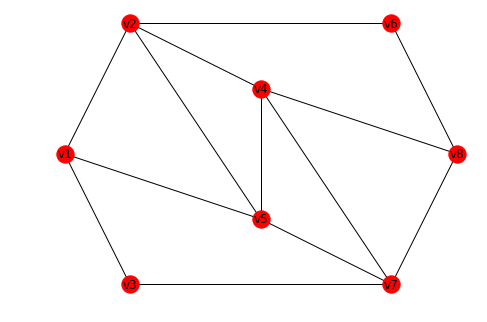

In [2]:
G1 = nx.Graph()
G1.add_nodes_from(['v1', 'v2', 'v3', 'v4', 'v5', 'v6', 'v7', 'v8'])
G1.add_edges_from([('v1', 'v2'), ('v1', 'v3'), ('v1', 'v5'), ('v2', 'v4'), ('v2', 'v5'), \
                   ('v2', 'v6'), ('v3', 'v7'), ('v4', 'v5'), ('v4', 'v7'), ('v4', 'v8'), \
                   ('v5', 'v7'), ('v6', 'v8'), ('v7', 'v8')])
pos1 = {'v1': (0, 0), \
        'v2': (5, 10), \
        'v3': (5, -10), \
        'v4': (15, 5), \
        'v5': (15, -5), \
        'v6': (25, 10), \
        'v7': (25,-10), \
        'v8': (30,0)}
nx.draw(G1, pos=pos1, with_labels=True)

In [3]:
# M が G のマッチングであるか判定する
def is_matching(G, M):
    m_degree = {v:0 for v in G.nodes()}
    for e in M:
        if not (G.has_node(e[0]) and G.has_node(e[1])):
#           print("Edge {0} is not an edge of the input").format(e)
            return False
        if not G.has_edge(*e):
#           print("Edge {0} is not an edge of the input").format(e)
            return False
        if m_degree[e[0]] == 1:
#           print("Vertex {0} is incident to multiple edges").format(e[0])
            return False
        if m_degree[e[1]] == 1:
#           print("Vertex {0} is incident to multiple edges").format(e[0])
            return False
        m_degree[e[0]] += 1
        m_degree[e[1]] += 1
    return True   

In [4]:
M1 = [('v1', 'v2'), ('v4', 'v7'), ('v6', 'v8')]

In [5]:
edgecolor_m1 = list(map(lambda e: 'blue' if e in M1 else 'black', G1.edges()))
nx.draw(G1, pos=pos1, edge_color = edgecolor_m1, with_labels=True)

In [6]:
is_matching(G1, M1)

True

In [7]:
M2 = [('v1', 'v3'), ('v2', 'v5'), ('v2', 'v6')]

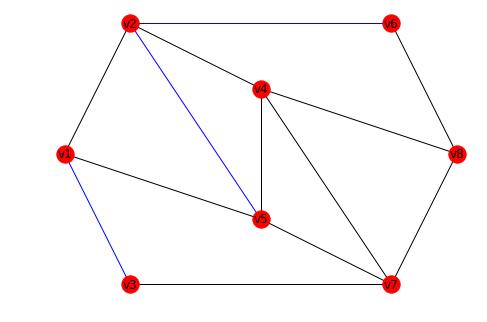

In [8]:
edgecolor_m2 = list(map(lambda e: 'blue' if e in M2 else 'black', G1.edges()))
nx.draw(G1, pos=pos1, edge_color = edgecolor_m2, with_labels=True)

In [9]:
is_matching(G1, M2)

False

In [10]:
# M が G の極大マッチングであるか判定する
def is_maximal_matching(G, M):
    if not is_matching(G, M):
        print("The input is not a matching".format(e))
        return False
    for e in G.edges():
        if e in M:
            continue
        M.append(e)
        if is_matching(G, M):
            print("Adding {0} results in a matching".format(e))
            return False
        M.remove(e)
    return True    

In [11]:
is_maximal_matching(G1, M1)

True

In [12]:
M3 = [('v1', 'v2'), ('v3', 'v7'), ('v6', 'v8')]

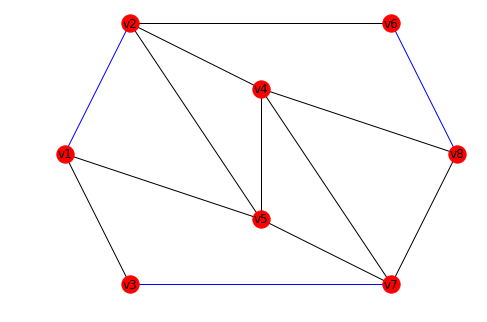

In [13]:
edgecolor_m3 = list(map(lambda e: 'blue' if e in M3 else 'black', G1.edges()))
nx.draw(G1, pos=pos1, edge_color = edgecolor_m3, with_labels=True)

In [14]:
is_maximal_matching(G1, M3)

Adding ('v4', 'v5') results in a matching


False

In [15]:
# M が G の完全マッチングであるか判定する
def is_perfect_matching(G, M):
    m_degree = {v:0 for v in G.nodes()}
    for e in M:
        if not (G.has_node(e[0]) and G.has_node(e[1])):
            return False
        if not G.has_edge(*e):
            return False
        if m_degree[e[0]] == 1 or m_degree[e[1]] == 1:
            return False
        m_degree[e[0]] += 1
        m_degree[e[1]] += 1
    for v in G.nodes():
        if m_degree[v] == 0:
            return False 
    return True   

In [16]:
is_perfect_matching(G1, M1)

False

In [17]:
M4 = [('v1', 'v2'), ('v3', 'v7'), ('v4', 'v5'), ('v6', 'v8')]
is_perfect_matching(G1, M4)

True

In [18]:
# グラフの頂点数は，その完全マッチングの辺数の2倍に等しい
nx.number_of_nodes(G1) == len(M4) * 2

True

## 最大マッチングと増加道

In [19]:
# 最大マッチングの計算 (結果は辞書)
nx.max_weight_matching(G1)

{('v1', 'v5'), ('v2', 'v6'), ('v3', 'v7'), ('v8', 'v4')}

## 最大マッチングと最小頂点被覆

In [20]:
# C が G の頂点被覆であるか判定する
def is_vertex_cover(G, C):
    for v in C:
        if not G.has_node(v):
            return False
    for e in G.edges():
        if not (e[0] in C or e[1] in C):
            print("Edge {0} is not covered".format(e))
            return False
    return True          

In [21]:
C1 = ['v2', 'v3', 'v4', 'v5', 'v6', 'v7']

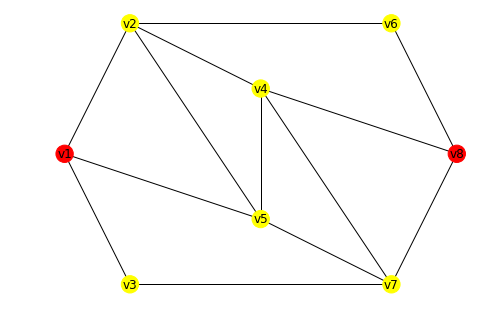

In [22]:
nodecolor_c1 = list(map(lambda v: 'yellow' if v in C1 else 'red', G1.nodes()))
nx.draw(G1, pos=pos1, node_color = nodecolor_c1, with_labels=True)

In [23]:
is_vertex_cover(G1, C1)

True

In [24]:
C2 = ['v1', 'v2', 'v3', 'v5', 'v8']

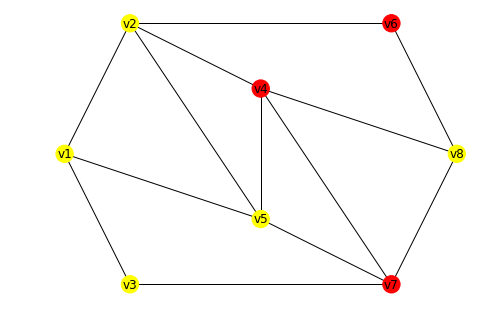

In [25]:
nodecolor_c2 = list(map(lambda v: 'yellow' if v in C2 else 'red', G1.nodes()))
nx.draw(G1, pos=pos1, node_color = nodecolor_c2, with_labels=True)

In [26]:
is_vertex_cover(G1, C2)

Edge ('v4', 'v7') is not covered


False